## Soft Margin Binary SVM classifier implementation using CVXPY

In [1]:
#reference: https://github.com/nipunbatra/nipunbatra.github.io/blob/master/teaching/ml-spring-19/notebooks/svm-rbf.ipynb

In [2]:
#%matplotlib inline
#import cvxpy as cp
from cvxpy import *
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('seaborn-whitegrid')
from scipy.spatial import ConvexHull as ConvexHull

In [3]:
data=datasets.load_iris()
X=np.array(data.data)
y=np.array(data.target)
X=np.delete(X, np.array([1,2]), axis = 1)
X.shape, y.shape

((150, 2), (150,))

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
y_=[]
for i in y:
    if i==2:
        y_.append(1)
    else:
        y_.append(-1)
y=np.array(y_)
y[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

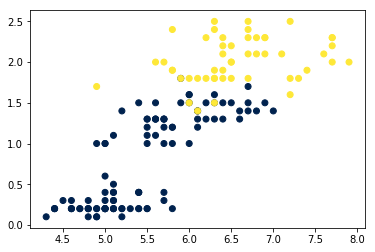

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap ='cividis')

In [7]:
#soft margin svm using "hinge-loss + penality"

class SVMsoft:
    def objective_fn(self, w, b, X, y, lmda = 0.5):
        #loss = cp.sum_entries(pos(1 - mul_elemwise(Y, X*beta - v)))
        return sum(pos(1-multiply(y,X*w + b))) + lmda*norm(w)**2
    def fit(self, X, y):
        w = Variable(2)
        b = Variable()
        #self.constraint = [( y[i]*(w.T@X[i] + b) - 1 ) >= 0 for i in range(len(X))]
        problem = Problem(Minimize(self.objective_fn(w,b,X,y)))
        problem.solve()
        print(problem.status)
        self.w = w.value
        self.b = b.value
        self.support_vectors = []
        for x in X:
                tmp = self.w @ x.T + self.b
                if 1-tmp<10**(-8) and 1-tmp>-10**(-8):
                    self.support_vectors.append(x)
                if -1-tmp<10**(-8) and -1-tmp>-10**(-8):
                    self.support_vectors.append(x)    
        self.support_vectors = np.unique(self.support_vectors, axis = 0)
    def predict(self, X):
        y=[]
        for x in X:
            tmp = self.w @ x.T + self.b
            if tmp >=0:
                y.append(1)
            else:
                y.append(-1)
        return np.array(y)
        

In [8]:
svm_s = SVMsoft()

In [9]:
svm_s.fit(X,y)

optimal


In [10]:
y_=svm_s.predict(X)
correct = len(y)-np.count_nonzero(y_-y)
print("Accuracy : ", correct*100/len(y))

Accuracy :  96.0


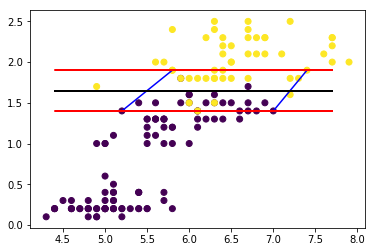

In [11]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

plt.scatter(X[:,0], X[:,1], c=y, cmap ='viridis')
x_plot = np.random.choice(X[:,0], 100)
y_plot = [-1*(svm_s.w[0]*i + svm_s.b)/svm_s.w[1] for i in x_plot]
y_plot1 = [-1*(svm_s.w[0]*i + svm_s.b+1)/svm_s.w[1] for i in x_plot]
y_plot2 = [-1*(svm_s.w[0]*i + svm_s.b-1)/svm_s.w[1] for i in x_plot]
plt.plot(x_plot, y_plot, color = 'black')
plt.plot(x_plot, y_plot1,  color = 'red', ls='--')
plt.plot(x_plot, y_plot2, ls = '--', color = 'red')

    
x_ = [i[0] for i in svm_s.support_vectors]
y_ = [i[1] for i in svm_s.support_vectors]
encircle(x_,y_, ec="blue", fc="none", linewidth=1.5)
plt.show()

The blue polygon passes through all the support vectors

## Soft Margin Binary SVM classifier implementation using AUTOGRAD

Can't be implemented using autograd's grad fn as using autograd we can find the gradient of the objective fn w.r.t. w and minimize w.r.t it but varying the value of won't be possible

## Using SKlearn's SVM

In [12]:
from  sklearn.svm import SVC as svmC

In [13]:
svm_sk=svmC(kernel='linear')

In [14]:
svm_sk.fit(X,y)
sv = svm_sk.support_vectors_

In [15]:
n=svm_sk.n_support_
n

array([20, 20], dtype=int32)

In [16]:
sv1 = sv[:n[0]]
sv2 = sv[n[0]:]


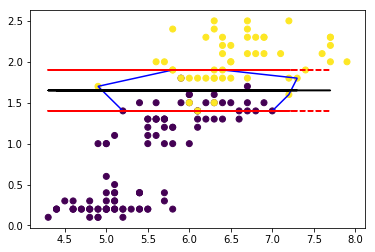

In [17]:
w = svm_sk.coef_[0]
b = svm_sk.intercept_[0]


x_plot = np.random.choice(X[:,0], 100)
y_plot = [-1*(w[0]*i + b)/w[1] for i in x_plot]
y_plot1 = [-1*(w[0]*i + b+1)/w[1] for i in x_plot]
y_plot2 = [-1*(w[0]*i + b-1)/w[1] for i in x_plot]
plt.plot(x_plot, y_plot, color = 'black')
plt.plot(x_plot, y_plot1,  color = 'red', ls='--')
plt.plot(x_plot, y_plot2, ls = '--', color = 'red')
plt.scatter(X[:,0], X[:,1], c=y, cmap ='viridis')


    
x_ = [i[0] for i in sv]
y_ = [i[1] for i in sv]
encircle(x_,y_, ec="blue", fc="none", linewidth=1.5)
plt.show()

The blue line passes through the support vectors and is not same as my implementation

## Using rbf kernel

In [26]:
from sklearn.svm import SVC as svmC
svc = svmC(kernel='rbf')
svc.fit(X,y)

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Varying gamma

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


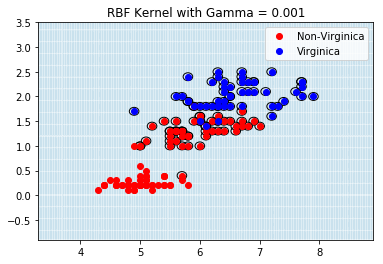

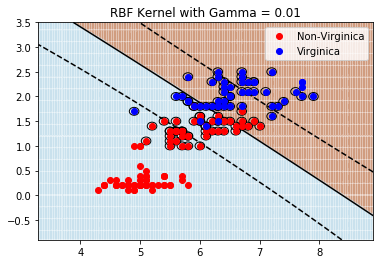

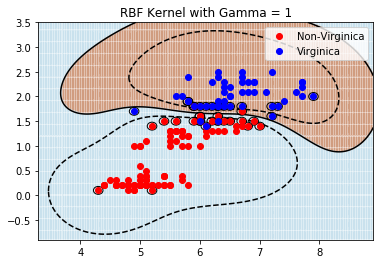

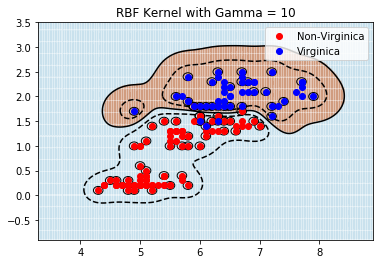

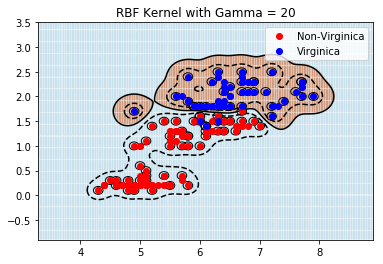

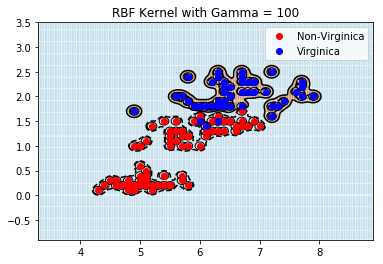

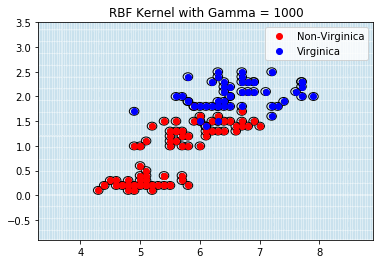

In [35]:
import numpy as np
for gamma in [0.001,0.01,1,10,20,100,1000]:
    svc = svmC(kernel='rbf',gamma=gamma)
    svc.fit(X,y)
    
    plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
    plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
    ax=plt.gca()
    for i in range(len(X[svc.support_])):
        ax.add_artist(plt.Circle((X[svc.support_][:,0][i],X[svc.support_][:,1][i]),0.08,fill=False))

    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("RBF Kernel with Gamma = {}".format(gamma))
    svs = svc.support_vectors_

    plt.legend()
    plt.show()

### Varying degree

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


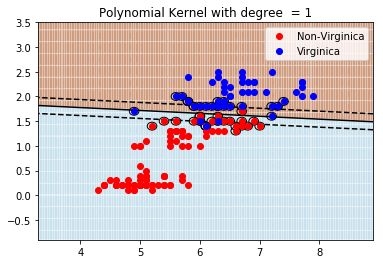

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


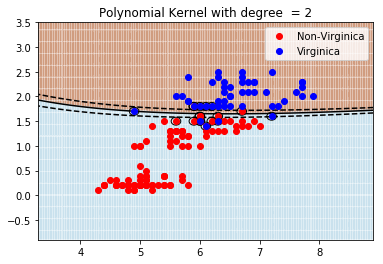

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


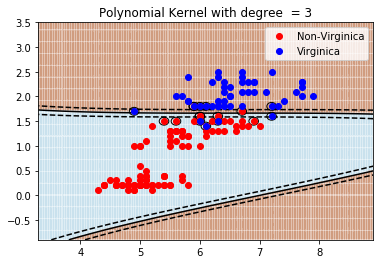

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


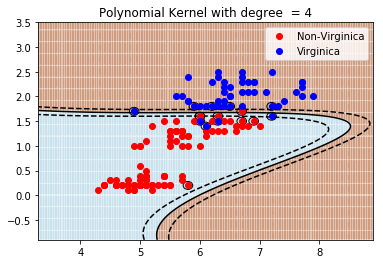

/home/shivji/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


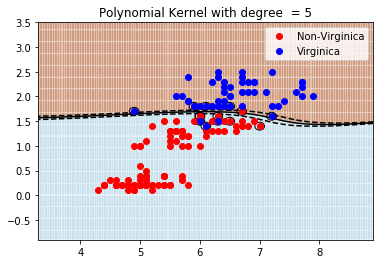

In [34]:
for deg in [1,2,3,4,5]:
    svc = svmC(kernel='poly',degree=deg)
    svc.fit(X,y)
    #plt.figure(figsize=(10,4))
    plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
    plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
    ax=plt.gca()
    for i in range(len(X[svc.support_])):
        ax.add_artist(plt.Circle((X[svc.support_][:,0][i],X[svc.support_][:,1][i]),0.08,fill=False))

    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("Polynomial Kernel with degree  = {}".format(deg))
    svs = svc.support_vectors_

    plt.legend()
    plt.show()